# Introduction to Artificial Intelligence

### Description

This project was conducted as part of the coursework for the *“Introduction to Artificial Intelligence”* module in the MSc Artificial Intelligence programme at **City, University of London (City St George’s)** during the Autumn 2025 term. The project was completed by **Nasos Karas** and **Sania Verma**.

The study uses the **Ocular Disease Recognition (ODIR-5K)** dataset obtained from Kaggle, which consists of retinal images labeled across multiple ocular disease categories. The primary objective of this project is to investigate, compare, and fine-tune different artificial intelligence models, including classical machine learning and deep learning approaches, to address the task of ocular disease image classification.

First, let's import the required libraries

In [ ]:
import pandas as pd

Let's read the data from the CSV file

In [ ]:
import os
#os.chdir('/content/IntrotoAI')
df = pd.read_csv('full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


## CNN

### CNN Color


The second model that we are going to use for image classification is Convolutoniary Neural Networks.
We will first work with the coloured resized images

First, let's import the necessary libraries. For the implementation of the CNN we will use Tensorflow

In [11]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
import io
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

To work with CNN, we need the vectors of each images without them being flattened as CNN do not expect 1D data. We will take the numpy arrays for each image, without flattening them, and store them to the respective column.

In [12]:
from PIL import Image
import numpy as np
import os

image_folder = 'resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['CNN_colour'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    # flat_vector = img_array.flatten()
    mask = df['filename'] == file # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'CNN_colour'] = img_array
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,A,H,M,O,filepath,labels,target,filename,input_data_resized,CNN_colour
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ...","[[[4, 0, 4], [4, 0, 4], [3, 0, 2], [3, 0, 2], ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[[[0, 0, 2], [0, 0, 2], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[[[0, 3, 2], [0, 2, 0], [0, 1, 0], [0, 1, 0], ..."


Let's balance the classes by taking 1,000 samples for each of the 8 class. If 1 class has less than 1,000 samples, then some duplicate rows will be used

In [11]:
color = pd.DataFrame()
for label in df['labels'].unique():
    color = pd.concat([color,df.loc[df['labels'] == label].sample(n=1000, replace=True)])
color

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,CNN_colour
2141,3011,62,Male,3011_left.jpg,3011_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3011_right.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1703,2538,58,Male,2538_left.jpg,2538_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2538_right.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1951,2809,60,Female,2809_left.jpg,2809_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2809_right.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4065,1006,64,Male,1006_left.jpg,1006_right.jpg,normal fundus,macular epiretinal membrane,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1006_left.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
623,717,79,Male,717_left.jpg,717_right.jpg,epiretinal membrane，drusen,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",717_right.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1261,62,Female,1261_left.jpg,1261_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1261_right.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4008,931,65,Male,931_left.jpg,931_right.jpg,suspected glaucoma，moderate non proliferative ...,suspected glaucoma，moderate non proliferative ...,0,1,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",931_left.jpg,"[[[0, 4, 0], [0, 4, 0], [0, 3, 0], [0, 2, 0], ..."
1119,1425,70,Female,1425_left.jpg,1425_right.jpg,normal fundus,suspected glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1425_right.jpg,"[[[0, 0, 4], [0, 0, 4], [1, 0, 2], [1, 0, 2], ..."
1038,1271,59,Female,1271_left.jpg,1271_right.jpg,glaucoma,glaucoma,0,0,1,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1271_right.jpg,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."


Let's take our X and y values. For input variable (X), we will divide by 255 to do Standardization. This is because, image pixel values range from 0 to 255, and we want to convert them to range 0 to 1, to help the model perform better.

In [12]:
import ast

color["target"] = color["target"].apply(ast.literal_eval)

X_CNN = np.stack(color["CNN_colour"].values).astype("float32") / 255.0
y_CNN = np.stack(color["target"].values).astype("float32")

Let's proceed with splitting the dataset into training, validation, and test splits as we did with SVMs.

In [13]:
#splitting the dataset into train and testing which is 80% training and 20% testing
X_trainCNN, X_tempCNN, y_trainCNN, y_tempCNN = train_test_split(
    X_CNN, y_CNN, test_size=0.20, random_state=42, shuffle=True, stratify=y_CNN
)

# Now splitting the dataset into test and validation where 20% breaks down to 10% test and 10% validation
X_valCNN, X_testCNN, y_valCNN, y_testCNN = train_test_split(
    X_tempCNN, y_tempCNN, test_size=0.5, random_state=42, shuffle=True, stratify=y_tempCNN
)

print(f"Training data: {X_trainCNN.shape}, Validation data: {X_valCNN.shape}, Test data: {X_testCNN.shape}")

Training data: (6400, 100, 100, 3), Validation data: (800, 100, 100, 3), Test data: (800, 100, 100, 3)


Let's create the architecture of the CNN. We will add 2 Convolutional layers. We will also add dropout and L2 regularization.

In [14]:
def build_cnn_model(
    stride,
    kernel_size,
    learning_rate,
    neurons
):
    model = Sequential()

    # --- Input Layer ---
    model.add(Input(shape=(100, 100, 3)))

    # --- First Convolution Block ---
    model.add(Conv2D(32, kernel_size, strides=stride, padding='same',activation='relu'))
    model.add(Conv2D(64, kernel_size, strides=stride, padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2))) # Pooling takes the max value of inputs of this subgrid and gives it to the next layer.

    # --- Second Convolution Block ---
    model.add(Conv2D(64, kernel_size, strides=stride, padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size, strides=stride, padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2)))

    # --- Fully Connected ---
    model.add(Flatten()) # turn the tensor to a flatten vector
    model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)))
    model.add(Dropout(0.5)) # 50% dropout to reduce overfitting

    # --- Output Layer ---
    model.add(Dense(8, activation='softmax')) # multi-class output

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [25]:
results = []
# --- Parameters to be tuned ---
stride = [1,2]
kernel_size = [(3,3), (4,4)]
learning_rate = [0.001,0.0001,0.00001]
neurons = [64,128,256]

best_acc = 0
best_params = None

for s in stride:
    for k in kernel_size:
        for l in learning_rate:
          for n in neurons:

            print(f"Training: stride={s}, kernel={k}, learning rate={l}, neurons={n}")

            model = build_cnn_model(
                stride=s,
                kernel_size=k,
                learning_rate=l,
                neurons=n
            )

            history = model.fit(
                X_trainCNN, y_trainCNN,
                validation_data=(X_valCNN, y_valCNN),
                epochs=15,
                batch_size=32,
                verbose=2
            )

            val_acc = max(history.history['val_accuracy'])

            results.append({
                "stride": s,
                "kernel_size": k,
                "learning_rate": l,
                "neurons": n,
                "val_accuracy": val_acc
            })

            if val_acc > best_acc:
                best_acc = val_acc
                best_params = (s, k, l, n)

print("Best validation accuracy:", best_acc)
print("Best parameters:", best_params)

Training: stride=1, kernel=(3, 3), learning rate=0.001, neurons=64
Epoch 1/15
200/200 - 12s - 61ms/step - accuracy: 0.1680 - loss: 2.0856 - val_accuracy: 0.2512 - val_loss: 1.9936
Epoch 2/15
200/200 - 6s - 28ms/step - accuracy: 0.2309 - loss: 1.9989 - val_accuracy: 0.3000 - val_loss: 1.8912
Epoch 3/15
200/200 - 6s - 28ms/step - accuracy: 0.2753 - loss: 1.8951 - val_accuracy: 0.3638 - val_loss: 1.7457
Epoch 4/15
200/200 - 6s - 29ms/step - accuracy: 0.3222 - loss: 1.7896 - val_accuracy: 0.3988 - val_loss: 1.6188
Epoch 5/15
200/200 - 10s - 52ms/step - accuracy: 0.3894 - loss: 1.6521 - val_accuracy: 0.4775 - val_loss: 1.4485
Epoch 6/15
200/200 - 6s - 29ms/step - accuracy: 0.4489 - loss: 1.5109 - val_accuracy: 0.5575 - val_loss: 1.3338
Epoch 7/15
200/200 - 6s - 29ms/step - accuracy: 0.4913 - loss: 1.4288 - val_accuracy: 0.5987 - val_loss: 1.1731
Epoch 8/15
200/200 - 6s - 29ms/step - accuracy: 0.5192 - loss: 1.3241 - val_accuracy: 0.6475 - val_loss: 1.1444
Epoch 9/15
200/200 - 6s - 30ms/step

Let's fit the data into the model with the best params and run it

In [37]:
# best_params obtained from hyperparameter search
best_model = build_cnn_model(
    stride=1,
    kernel_size=(3, 3),
    learning_rate=0.001,
    neurons=256
)

# Now you train this model
history = best_model.fit(
    X_trainCNN,
    y_trainCNN,
    validation_data=(X_valCNN, y_valCNN),
    epochs=40,
    batch_size=16,
    verbose=2
)



Epoch 1/40
400/400 - 11s - 28ms/step - accuracy: 0.2066 - loss: 2.1009 - val_accuracy: 0.3150 - val_loss: 1.9299
Epoch 2/40
400/400 - 7s - 17ms/step - accuracy: 0.2905 - loss: 1.9171 - val_accuracy: 0.3562 - val_loss: 1.7914
Epoch 3/40
400/400 - 7s - 17ms/step - accuracy: 0.4298 - loss: 1.6597 - val_accuracy: 0.4925 - val_loss: 1.5115
Epoch 4/40
400/400 - 7s - 17ms/step - accuracy: 0.5239 - loss: 1.4303 - val_accuracy: 0.5938 - val_loss: 1.3535
Epoch 5/40
400/400 - 7s - 17ms/step - accuracy: 0.6016 - loss: 1.2843 - val_accuracy: 0.6612 - val_loss: 1.1425
Epoch 6/40
400/400 - 7s - 17ms/step - accuracy: 0.6630 - loss: 1.1539 - val_accuracy: 0.7163 - val_loss: 1.0502
Epoch 7/40
400/400 - 7s - 17ms/step - accuracy: 0.7086 - loss: 1.0536 - val_accuracy: 0.7437 - val_loss: 0.9736
Epoch 8/40
400/400 - 7s - 18ms/step - accuracy: 0.7416 - loss: 0.9711 - val_accuracy: 0.7700 - val_loss: 0.9464
Epoch 9/40
400/400 - 7s - 18ms/step - accuracy: 0.7655 - loss: 0.9282 - val_accuracy: 0.8012 - val_loss

### Get Training, Validation, and Testing accuracy for the best model

In [23]:
train_acc = history.history['accuracy'][-1]
val_acc = max(history.history['val_accuracy'])
test_loss, test_acc = best_model.evaluate(
    X_testCNN,
    y_testCNN,
    verbose=0
)
print(f"Training accuracy: {train_acc}")
print(f"Validation accuracy: {val_acc}")
print(f"Test accuracy: {test_acc}")

Training accuracy: 0.913281261920929
Validation accuracy: 0.8687499761581421
Test accuracy: 0.8374999761581421


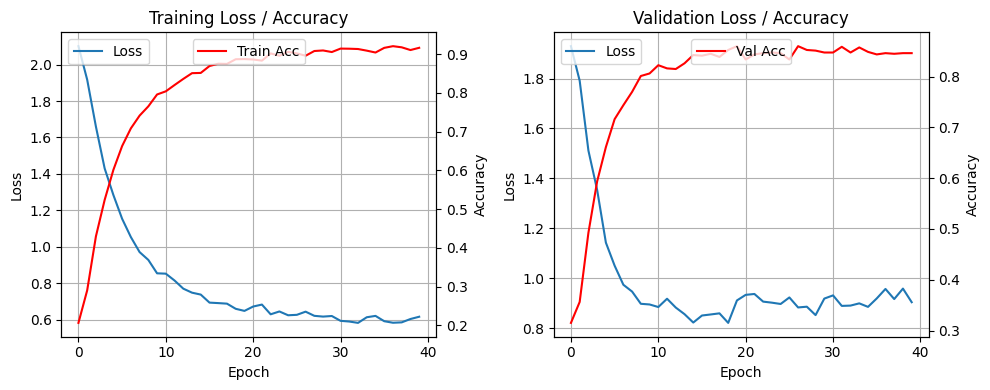

In [38]:
import matplotlib.pyplot as plt

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # adjust figsize as needed

# ------------------------
# 1. Training Loss & Accuracy
# ------------------------
axes[0].plot(history.history['loss'], label='Loss')
axes[0].set_title('Training Loss / Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='upper left')
axes[0].grid(True)

ax0_2 = axes[0].twinx()
ax0_2.plot(history.history['accuracy'], color='red', label='Train Acc')
ax0_2.set_ylabel('Accuracy')
ax0_2.legend(loc='upper center')

# ------------------------
# 2. Validation Loss & Accuracy
# ------------------------
axes[1].plot(history.history['val_loss'], label='Loss')
axes[1].set_title('Validation Loss / Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')
axes[1].grid(True)

ax1_2 = axes[1].twinx()
ax1_2.plot(history.history['val_accuracy'], color='red', label='Val Acc')
ax1_2.set_ylabel('Accuracy')
ax1_2.legend(loc='upper center')

plt.tight_layout()
plt.show()


### Let's make a plot to compare the last val. accuracy of all hyperparameters combinations

In [28]:
labels = [
    f"s={r['stride']}, k={r['kernel_size']}, lr={r['learning_rate']}, n={r['neurons']}"
    for r in results
]

val_acc = [r['val_accuracy'] for r in results]

train_acc = history.history['accuracy'][-1]
val_acc_best = history.history['val_accuracy'][-1]

In [29]:
best_params = max(results, key=lambda x: x['val_accuracy'])

print(best_params)

{'stride': 1, 'kernel_size': (3, 3), 'learning_rate': 0.001, 'neurons': 256, 'val_accuracy': 0.8537499904632568}


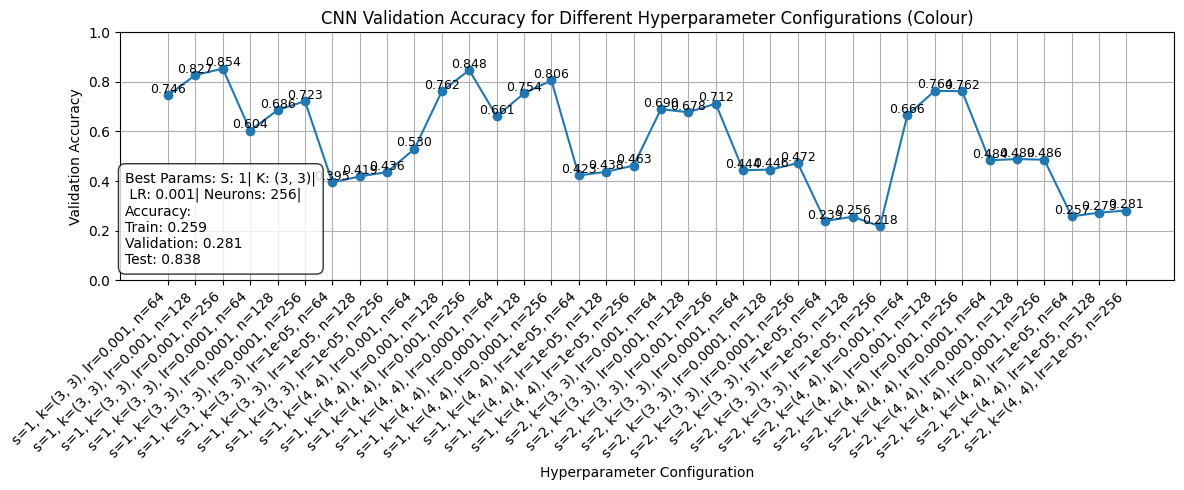

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(
    range(len(val_acc)),
    val_acc,
    marker='o',
    linestyle='-'
)

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylabel("Validation Accuracy")
plt.xlabel("Hyperparameter Configuration")
plt.title("CNN Validation Accuracy for Different Hyperparameter Configurations (Colour)")

# Annotate points
for i, acc in enumerate(val_acc):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center', fontsize=9)

# Add box with best params and accuracies, shifted to the left
info_text = (
    f"Best Params: "
    f"S: {best_params['stride']}| "
    f"K: {best_params['kernel_size']}|\n "
    f"LR: {best_params['learning_rate']}| "
    f"Neurons: {best_params['neurons']}|\n"
    f"Accuracy:\n"
    f"Train: {train_acc:.3f}\n"
    f"Validation: {val_acc_best:.3f}\n"
    f"Test: {test_acc:.3f}"
)

plt.gca().text(
    0.005, 0.44, info_text,  # x=0.005 moves it more to the left
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

plt.ylim(0, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()



### CNN with grayscale


In [13]:
from PIL import Image
import numpy as np
import os

image_folder = 'gray_resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['CNN_gray'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    mask = df['filename'] == file # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'CNN_gray'] = img_array
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,H,M,O,filepath,labels,target,filename,input_data_resized,CNN_colour,CNN_gray
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ...","[[[4, 0, 4], [4, 0, 4], [3, 0, 2], [3, 0, 2], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[[[0, 0, 2], [0, 0, 2], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [14]:
gray = pd.DataFrame()
for label in df['labels'].unique():
    gray = pd.concat([gray,df.loc[df['labels'] == label].sample(n=1000, replace=True)])
gray

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,H,M,O,filepath,labels,target,filename,input_data_resized,CNN_colour,CNN_gray
5185,2852,64,Male,2852_left.jpg,2852_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2852_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
147,174,71,Female,174_left.jpg,174_right.jpg,pathological myopia,normal fundus,0,0,0,...,0,1,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",174_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1615,2437,74,Male,2437_left.jpg,2437_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2437_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
5510,3205,60,Male,3205_left.jpg,3205_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3205_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
5165,2830,60,Female,2830_left.jpg,2830_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",2830_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,1497,54,Male,1497_left.jpg,1497_right.jpg,glaucoma,glaucoma,0,0,1,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1497_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4217,1248,74,Female,1248_left.jpg,1248_right.jpg,glaucoma,glaucoma,0,0,1,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1248_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4231,1267,55,Male,1267_left.jpg,1267_right.jpg,glaucoma,glaucoma,0,0,1,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1267_left.jpg,"[1, 0, 4, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, ...","[[[1, 0, 4], [1, 0, 2], [1, 0, 0], [1, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4326,1441,50,Male,1441_left.jpg,1441_right.jpg,glaucoma,normal fundus,0,0,1,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['G'],"[0, 0, 1, 0, 0, 0, 0, 0]",1441_left.jpg,"[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...","[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [15]:
import ast

gray["target"] = gray["target"].apply(ast.literal_eval)

X_CNN = np.stack(gray["CNN_gray"].values).astype("float32") / 255.0
y_CNN = np.stack(gray["target"].values).astype("float32")

In [16]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
import io
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

#splitting the dataset into train and testing which is 80% training and 20% testing
X_trainCNN, X_tempCNN, y_trainCNN, y_tempCNN = train_test_split(
    X_CNN, y_CNN, test_size=0.20, random_state=42, shuffle=True, stratify=y_CNN
)

# Now splitting the dataset into test and validation where 20% breaks down to 10% test and 10% validation
X_valCNN, X_testCNN, y_valCNN, y_testCNN = train_test_split(
    X_tempCNN, y_tempCNN, test_size=0.5, random_state=42, shuffle=True, stratify=y_tempCNN
)

print(f"Training data: {X_trainCNN.shape}, Validation data: {X_valCNN.shape}, Test data: {X_testCNN.shape}")

Training data: (6400, 100, 100, 3), Validation data: (800, 100, 100, 3), Test data: (800, 100, 100, 3)


In [17]:
def build_cnn_model(
    stride,
    kernel_size,
    learning_rate,
    neurons
):
    model = Sequential()

    # --- Input Layer ---
    model.add(Input(shape=(100, 100, 3)))

    # --- First Convolution Block ---
    model.add(Conv2D(32, kernel_size, strides=stride, padding='same',activation='relu'))
    model.add(Conv2D(64, kernel_size, strides=stride, padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2))) # Pooling takes the max value of inputs of this subgrid and gives it to the next layer.

    # --- Second Convolution Block ---
    model.add(Conv2D(64, kernel_size, strides=stride, padding='same', activation='relu'))
    model.add(Conv2D(64, kernel_size, strides=stride, padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2)))

    # --- Fully Connected ---
    model.add(Flatten()) # turn the tensor to a flatten vector
    model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)))
    model.add(Dropout(0.5)) # 50% dropout to reduce overfitting

    # --- Output Layer ---
    model.add(Dense(8, activation='softmax')) # multi-class output

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [24]:
results = []
# --- Parameters to be tuned ---
stride = [1,2]
kernel_size = [(3,3), (4,4)]
learning_rate = [0.001,0.0001,0.00001]
neurons = [64,128,256]

best_acc = 0
best_params = None

for s in stride:
    for k in kernel_size:
        for l in learning_rate:
          for n in neurons:

            print(f"Training: stride={s}, kernel={k}, learning rate={l}, neurons={n}")

            model = build_cnn_model(
                stride=s,
                kernel_size=k,
                learning_rate=l,
                neurons=n
            )

            history = model.fit(
                X_trainCNN, y_trainCNN,
                validation_data=(X_valCNN, y_valCNN),
                epochs=15,
                batch_size=32,
                verbose=2
            )

            val_acc = max(history.history['val_accuracy'])

            results.append({
                "stride": s,
                "kernel_size": k,
                "learning_rate": l,
                "neurons": n,
                "val_accuracy": val_acc
            })

            if val_acc > best_acc:
                best_acc = val_acc
                best_params = (s, k, l, n)

print("Best validation accuracy:", best_acc)
print("Best parameters:", best_params)

Training: stride=1, kernel=(3, 3), learning rate=0.001, neurons=64
Epoch 1/15
200/200 - 13s - 63ms/step - accuracy: 0.1420 - loss: 2.0994 - val_accuracy: 0.1300 - val_loss: 2.0825
Epoch 2/15
200/200 - 6s - 31ms/step - accuracy: 0.1745 - loss: 2.0443 - val_accuracy: 0.1912 - val_loss: 2.0216
Epoch 3/15
200/200 - 6s - 30ms/step - accuracy: 0.1942 - loss: 2.0280 - val_accuracy: 0.2425 - val_loss: 2.0056
Epoch 4/15
200/200 - 6s - 30ms/step - accuracy: 0.2120 - loss: 2.0144 - val_accuracy: 0.2050 - val_loss: 2.0083
Epoch 5/15
200/200 - 6s - 30ms/step - accuracy: 0.2209 - loss: 2.0024 - val_accuracy: 0.2275 - val_loss: 1.9625
Epoch 6/15
200/200 - 6s - 30ms/step - accuracy: 0.2697 - loss: 1.9507 - val_accuracy: 0.3487 - val_loss: 1.8410
Epoch 7/15
200/200 - 6s - 29ms/step - accuracy: 0.3092 - loss: 1.8544 - val_accuracy: 0.4087 - val_loss: 1.7432
Epoch 8/15
200/200 - 6s - 30ms/step - accuracy: 0.3361 - loss: 1.7868 - val_accuracy: 0.4175 - val_loss: 1.6944
Epoch 9/15
200/200 - 6s - 29ms/step 

Let's fit the data into the model with the best params

In [28]:
# best_params obtained from hyperparameter search
best_model = build_cnn_model(
    stride=1,
    kernel_size=(3, 3),
    learning_rate=0.001,
    neurons=256
)

# Now you train this model
history = best_model.fit(
    X_trainCNN,
    y_trainCNN,
    validation_data=(X_valCNN, y_valCNN),
    epochs=40,
    batch_size=16,
    verbose=2
)


Epoch 1/40
400/400 - 15s - 37ms/step - accuracy: 0.1708 - loss: 2.1330 - val_accuracy: 0.1562 - val_loss: 2.1148
Epoch 2/40
400/400 - 7s - 17ms/step - accuracy: 0.2467 - loss: 1.9986 - val_accuracy: 0.2537 - val_loss: 1.9169
Epoch 3/40
400/400 - 7s - 17ms/step - accuracy: 0.3373 - loss: 1.8173 - val_accuracy: 0.4000 - val_loss: 1.6319
Epoch 4/40
400/400 - 7s - 17ms/step - accuracy: 0.4425 - loss: 1.5754 - val_accuracy: 0.5400 - val_loss: 1.4663
Epoch 5/40
400/400 - 7s - 17ms/step - accuracy: 0.5342 - loss: 1.4112 - val_accuracy: 0.6175 - val_loss: 1.2382
Epoch 6/40
400/400 - 7s - 17ms/step - accuracy: 0.6100 - loss: 1.2361 - val_accuracy: 0.6650 - val_loss: 1.1172
Epoch 7/40
400/400 - 7s - 17ms/step - accuracy: 0.6648 - loss: 1.1150 - val_accuracy: 0.7150 - val_loss: 1.0016
Epoch 8/40
400/400 - 7s - 18ms/step - accuracy: 0.6917 - loss: 1.0374 - val_accuracy: 0.7437 - val_loss: 0.9538
Epoch 9/40
400/400 - 7s - 17ms/step - accuracy: 0.7303 - loss: 0.9666 - val_accuracy: 0.7625 - val_loss

Get Training, Validation, and Testing accuracy for the model with the best params

In [29]:
train_acc = history.history['accuracy'][-1]
val_acc = max(history.history['val_accuracy'])
test_loss, test_acc = best_model.evaluate(
    X_testCNN,
    y_testCNN,
    verbose=0
)
print(f"Training accuracy: {train_acc}")
print(f"Validation accuracy: {val_acc}")
print(f"Test accuracy: {test_acc}")

Training accuracy: 0.8940625190734863
Validation accuracy: 0.8600000143051147
Test accuracy: 0.8387500047683716


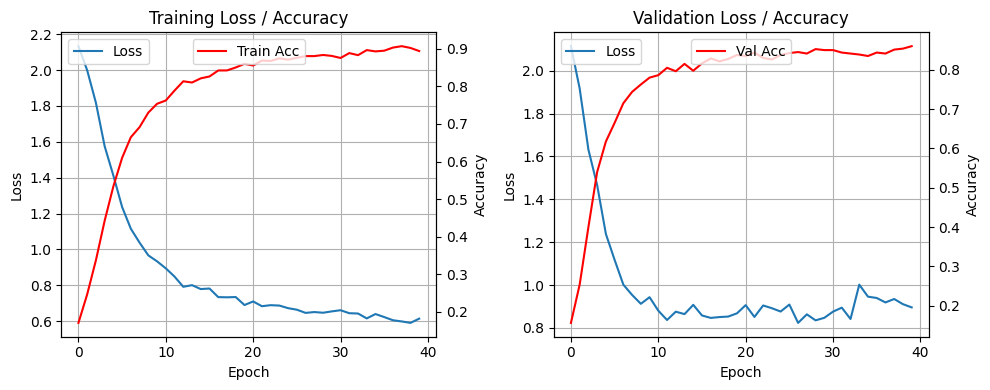

In [30]:
import matplotlib.pyplot as plt

# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # adjust figsize as needed

# ------------------------
# 1. Training Loss & Accuracy
# ------------------------
axes[0].plot(history.history['loss'], label='Loss')
axes[0].set_title('Training Loss / Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='upper left')
axes[0].grid(True)

ax0_2 = axes[0].twinx()
ax0_2.plot(history.history['accuracy'], color='red', label='Train Acc')
ax0_2.set_ylabel('Accuracy')
ax0_2.legend(loc='upper center')

# ------------------------
# 2. Validation Loss & Accuracy
# ------------------------
axes[1].plot(history.history['val_loss'], label='Loss')
axes[1].set_title('Validation Loss / Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')
axes[1].grid(True)

ax1_2 = axes[1].twinx()
ax1_2.plot(history.history['val_accuracy'], color='red', label='Val Acc')
ax1_2.set_ylabel('Accuracy')
ax1_2.legend(loc='upper center')

plt.tight_layout()
plt.show()

Let's make a plot for all combinations

In [31]:
labels = [
    f"s={r['stride']}, k={r['kernel_size']}, lr={r['learning_rate']}, n={r['neurons']}"
    for r in results
]

val_acc = [r['val_accuracy'] for r in results]

train_acc = history.history['accuracy'][-1]
val_acc_best = history.history['val_accuracy'][-1]

In [32]:
best_params = max(results, key=lambda x: x['val_accuracy'])

print(best_params)


{'stride': 1, 'kernel_size': (3, 3), 'learning_rate': 0.001, 'neurons': 256, 'val_accuracy': 0.8512499928474426}


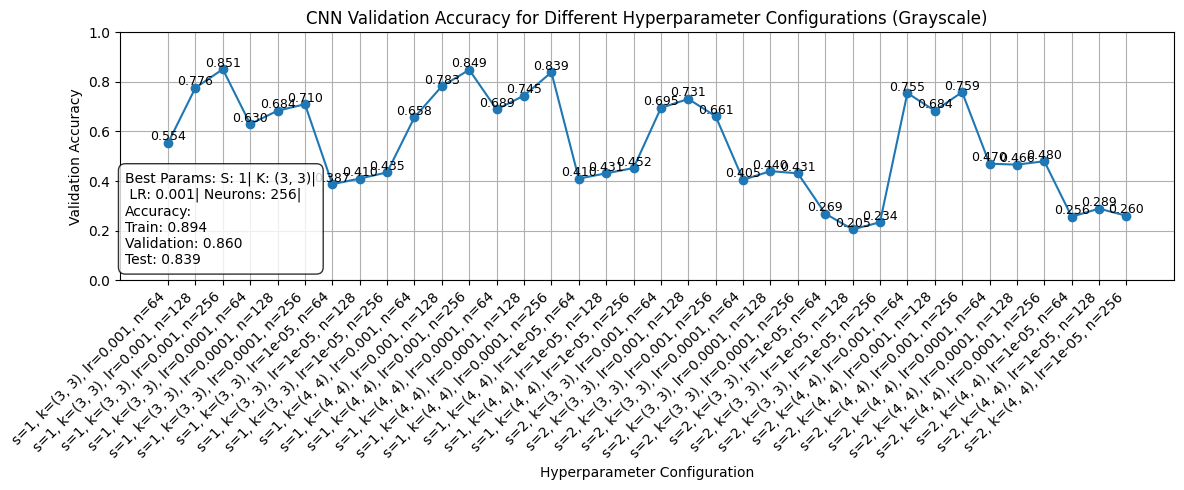

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.plot(
    range(len(val_acc)),
    val_acc,
    marker='o',
    linestyle='-'
)

plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylabel("Validation Accuracy")
plt.xlabel("Hyperparameter Configuration")
plt.title("CNN Validation Accuracy for Different Hyperparameter Configurations (Grayscale)")

# Annotate points
for i, acc in enumerate(val_acc):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center', fontsize=9)

# Add box with best params and accuracies, shifted to the left
info_text = (
    f"Best Params: "
    f"S: {best_params['stride']}| "
    f"K: {best_params['kernel_size']}|\n "
    f"LR: {best_params['learning_rate']}| "
    f"Neurons: {best_params['neurons']}|\n"
    f"Accuracy:\n"
    f"Train: {train_acc:.3f}\n"
    f"Validation: {val_acc_best:.3f}\n"
    f"Test: {test_acc:.3f}"
)

plt.gca().text(
    0.005, 0.44, info_text,  # x=0.005 moves it more to the left
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8)
)

plt.ylim(0, 1.0)
plt.grid(True)
plt.tight_layout()
plt.show()



Let's make a barplot to compare the 3 types of accuracy betweem coloured and grayscale images

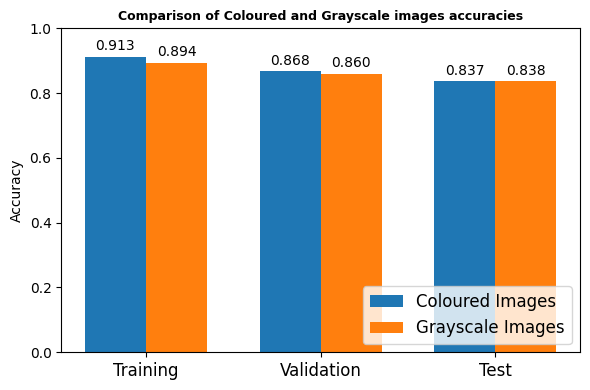

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values
labels = ['Training', 'Validation', 'Test']
colored = [0.913, 0.868, 0.837]
gray = [0.894, 0.860, 0.838]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(6, 4))

# Vivid colors
rects1 = ax.bar(x - width/2, colored, width, label='Coloured Images', color='#1f77b4')  # vivid blue
rects2 = ax.bar(x + width/2, gray, width, label='Grayscale Images', color='#ff7f0e')    # vivid orange

# Labels and titles
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1)
ax.set_title('Comparison of Coloured and Grayscale images accuracies', fontsize=9, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc='lower right',fontsize=12)

# Annotate bars with values
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# Remove grid
ax.grid(False)

plt.tight_layout()
plt.show()
